## Практическое задание 6. Градиентный бустинг ~~своими руками~~

Поздравляю! Это финальное упражнение в нашем курсе. Проявите все своё старание, терпение и опыт, чтобы выполнить его.  
Теперь вы многое знаете из машинного обучения и для вас не составит сложности попробовать разные алгоритмы, новые библиотеки и применить их к реальной задаче.

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data).  

* Загрузите таблицу **application_train.csv**;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_csv('application_train.csv')

df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#заполняем пустые ячейки
for column in df:   
    if df[column].dtype == object:
        df[column] = df[column].fillna('')
    elif df[column].dtype == int:
        df[column] = df[column].fillna(0)
    else:
        df[column] = df[column].fillna(0.)

Y = df.TARGET.values
X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)

X_num = X.loc[:, X.dtypes != object]   # pandas типы должны быть int, float or bool
num_columns = X_num.columns

x_train, x_test, y_train, y_test = train_test_split(np.array(X_num), Y, test_size=0.3, random_state=0) #делим на выборки

__Задание 2. (1.5 балла)__

Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [15]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import average_precision_score
from time import time

In [16]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train, y_train)
y_lgbm = lgbm_model.predict_proba(x_test)[:, 1]
print('Точность lgbm:', average_precision_score(y_test, y_lgbm))

[LightGBM] [Info] Number of positive: 17485, number of negative: 197772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11115
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081228 -> initscore=-2.425771
[LightGBM] [Info] Start training from score -2.425771
Точность lgbm: 0.23159230793933594


In [17]:
cat_model = CatBoostClassifier(task_type='GPU', loss_function='Logloss')
cat_model.fit(x_train, y_train, verbose=False)
y_cat = cat_model.predict_proba(x_test)[:, 1]
print('Точность catboost:', average_precision_score(y_test, y_cat))

Точность catboost: 0.23380943003650667


**Выводы:** CatBoost показывает довольно хорошие результаты с дефолтными параметрами,в то время как LightGBM требует настройки гиперпараметров. В следующих экспериментах будет видно, что после подбора гиперпараметров оба метода дают примерно одинаковую точность.

__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

##### Выполнение

Шаг 1. Проведем исследование работы CatBoost. Зафиксируем число итераций (возьмем небольшое количество, чтобы алгоритм работал не слишком долго). Подберем значения максимальной глубины дерева и оптимизируемую лосс-функцию (для задач классификации кроме logloss не оказалось подходящих вариантов среди поддерживаемых библиотекой). Также подберем значение скорости обучения для взятого числа деревьев.

Шаг 2. Увеличим число деревьев и подберем новое значение скорости сходимости; в качестве значений остальных параметров возьмем найденные в предыдущем эксперименте. Сначала поиск по логарифмической шкале.

Шаг 3. Поизводим поиск по линейной шкале в найденном диапазоне.

Шаг 4. Вычисляем точность на тестовой выборке, используя найденные параметры.

Далее исследуем LGBMClassifier аналогичным образом.

In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [10 ** x for x in range(-3, 1)],
    'loss_function': ['CrossEntropy'],
    'depth': range(4, 8)
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=100, verbose=False)
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE656B6570>,
             param_grid={'depth': range(4, 8),
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss_function': ['CrossEntropy']},
             scoring='average_precision')

In [19]:
gs.best_params_

{'depth': 7, 'learning_rate': 0.1, 'loss_function': 'CrossEntropy'}

In [20]:
# шаг 2
params = {
    'learning_rate': [10 ** x for x in range(-3, 1)]
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=1000, verbose=False, 
                               loss_function='CrossEntropy', depth=6)
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE6587EF30>,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1]},
             scoring='average_precision')

In [21]:
gs.best_params_

{'learning_rate': 0.01}

In [22]:
# шаг 3
params = {
    'learning_rate': [0.01, 0.04, 0.08]
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=1000, verbose=False, 
                               loss_function='CrossEntropy', depth=6)
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE603D4A70>,
             param_grid={'learning_rate': [0.01, 0.04, 0.08]},
             scoring='average_precision')

In [23]:
gs.best_params_

{'learning_rate': 0.04}

In [24]:
# шаг 4
start = time()
cat_model = CatBoostClassifier(task_type='GPU', loss_function='CrossEntropy', depth=6, 
                              iterations=1000, learning_rate=0.04)
cat_model.fit(x_train, y_train, verbose=False)
y_cat = cat_model.predict_proba(x_test)[:, 1]
end = time()
print('catboost classifier score:', average_precision_score(y_test, y_cat))
print('time:', end - start)

catboost classifier score: 0.23452759987523913
time: 31.134244918823242


Точность немного улучшилась по сравнению с дефолтными параметрами алгоритма.

In [25]:
# то же самое для другой модели
params = {
    'learning_rate': [10 ** x for x in range(-3, 1)],
    'metric': ['binary_logloss'],
    'max_depth': range(4, 8)
}

lgbm_model = LGBMClassifier( n_estimators=100)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 11656, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11169
[LightGBM] [Info] Number of data points in the train set: 143504, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081224 -> initscore=-2.425829
[LightGBM] [Info] Start training from score -2.425829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': range(4, 8),
                         'metric': ['binary_logloss']},
             scoring='average_precision')

In [26]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'metric': 'binary_logloss'}

In [27]:
params = {
    'learning_rate': [10 ** x for x in range(-3, 1)]
}

lgbm_model = LGBMClassifier( n_estimators=1000, metric='binary_logloss', max_depth=5)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 11656, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11169
[LightGBM] [Info] Number of data points in the train set: 143504, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081224 -> initscore=-2.425829
[LightGBM] [Info] Start training from score -2.425829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(cv=3,
             estimator=LGBMClassifier(max_depth=5, metric='binary_logloss',
                                      n_estimators=1000),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1]},
             scoring='average_precision')

In [28]:
gs.best_params_

{'learning_rate': 0.01}

In [29]:
params = {
    'learning_rate': [0.01, 0.04, 0.08]
}

lgbm_model = LGBMClassifier( n_estimators=1000, metric='binary_logloss', max_depth=5)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 11656, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11169
[LightGBM] [Info] Number of data points in the train set: 143504, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081224 -> initscore=-2.425829
[LightGBM] [Info] Start training from score -2.425829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(cv=3,
             estimator=LGBMClassifier(max_depth=5, metric='binary_logloss',
                                      n_estimators=1000),
             param_grid={'learning_rate': [0.01, 0.04, 0.08]},
             scoring='average_precision')

In [30]:
gs.best_params_

{'learning_rate': 0.01}

In [31]:
start = time()
lgbm_model = LGBMClassifier(n_estimators=1000, metric='binary_logloss', max_depth=5, 
                            learning_rate=0.01)
lgbm_model.fit(x_train, y_train)
y_lgbm = lgbm_model.predict_proba(x_test)[:, 1]
end = time()
print('lgbm classifier score:', average_precision_score(y_test, y_lgbm))
print('time:', end - start)

[LightGBM] [Info] Number of positive: 17485, number of negative: 197772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11115
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081228 -> initscore=-2.425771
[LightGBM] [Info] Start training from score -2.425771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Качество модели улучшилось по сравнению с моделью с дефолтными параметрами.

**Выводы:** При одинаковом установленном числе итераций (построенных деревьев) Catboost требует немного более высокой скорости сходимости. Также Catboost хорошо работает с более глубокими деревьями, чем LightGBM.

__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

In [32]:
one_hot_X = pd.get_dummies(X, drop_first=True)

x_train_ohe, x_test_ohe = train_test_split(one_hot_X, test_size=0.3, random_state=0)

**Модель 1** Поберем параметры для метода Catboost (one-hot-encoding):

In [33]:
params = {
    'learning_rate': [10 ** x for x in range(-3, 1)],
    'loss_function': ['CrossEntropy'],
    'depth': range(4, 8)
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=100, verbose=False)
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_ohe, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE659463C0>,
             param_grid={'depth': range(4, 8),
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss_function': ['CrossEntropy']},
             scoring='average_precision')

In [34]:
gs.best_params_

{'depth': 7, 'learning_rate': 0.1, 'loss_function': 'CrossEntropy'}

In [35]:
params = {
    'depth': range(7, 10)
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=100, verbose=False, 
                              learning_rate=0.1, loss_function='CrossEntropy')
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_ohe, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE8F972A20>,
             param_grid={'depth': range(7, 10)}, scoring='average_precision')

In [36]:
gs.best_params_

{'depth': 7}

In [37]:
params = {
    'learning_rate': [10 ** x for x in range(-3, 0)]
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=1000, verbose=False, 
                              depth=8, loss_function='CrossEntropy')
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_ohe, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE58258E00>,
             param_grid={'learning_rate': [0.001, 0.01, 0.1]},
             scoring='average_precision')

In [38]:
gs.best_params_

{'learning_rate': 0.01}

In [39]:
params = {
    'learning_rate': [0.01, 0.04, 0.08]
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=1000, verbose=False, 
                              depth=8, loss_function='CrossEntropy')
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_ohe, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE8F971C70>,
             param_grid={'learning_rate': [0.01, 0.04, 0.08]},
             scoring='average_precision')

In [40]:
gs.best_params_

{'learning_rate': 0.01}

In [41]:
start = time()
cat_model = CatBoostClassifier(task_type='GPU', loss_function='CrossEntropy', depth=8, 
                              iterations=1000, learning_rate=0.04)
cat_model.fit(x_train_ohe, y_train, verbose=False)
y_cat = cat_model.predict_proba(x_test_ohe)[:, 1]
end = time()
print('catboost classifier score:', average_precision_score(y_test, y_cat))
print('time:', end - start)

catboost classifier score: 0.24257705956664444
time: 23.50592303276062


**Вывод:** Добавление категориальных признаков привело к улучшению качества модели. 




**Модель 2** Теперь аналогичным образом подберем параметры для LightGBM (one-hot-encoding):

In [42]:
params = {
    'learning_rate': [10 ** x for x in range(-3, 1)],
    'metric': ['binary_logloss'],
    'max_depth': range(4, 8)
}

lgbm_model = LGBMClassifier(n_estimators=100)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_ohe, y_train)

ValueError: 
All the 48 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1284, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 955, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\lightgbm\engine.py", line 282, in train
    booster = Booster(params=params, train_set=train_set)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\lightgbm\basic.py", line 3637, in __init__
    train_set.construct()
  File "C:\Users\admin\anaconda3\Lib\site-packages\lightgbm\basic.py", line 2576, in construct
    self._lazy_init(
  File "C:\Users\admin\anaconda3\Lib\site-packages\lightgbm\basic.py", line 2208, in _lazy_init
    return self.set_feature_name(feature_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\lightgbm\basic.py", line 3032, in set_feature_name
    _safe_call(
  File "C:\Users\admin\anaconda3\Lib\site-packages\lightgbm\basic.py", line 296, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode("utf-8"))
lightgbm.basic.LightGBMError: Do not support special JSON characters in feature name.


In [ ]:
gs.best_params_

In [ ]:
params = {
    'learning_rate': [10 ** x for x in range(-3, 0)]
}

lgbm_model = LGBMClassifier(n_estimators=1000, max_depth=6, metric='binary_logloss')
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_ohe, y_train)

In [ ]:
gs.best_params_

In [ ]:
params = {
    'learning_rate': [0.01, 0.04, 0.08]
}

lgbm_model = LGBMClassifier(n_estimators=1000, max_depth=6, metric='binary_logloss')
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_ohe, y_train)

In [ ]:
gs.best_params_

In [ ]:
start = time()
lgbm_model = LGBMClassifier(n_estimators=1000, max_depth=6, metric='binary_logloss',
                           learning_rate=0.01)
lgbm_model.fit(x_train_ohe, y_train)
y_lgbm = lgbm_model.predict_proba(x_test_ohe)[:, 1]
end = time()
print('lgbm classifier score:', average_precision_score(y_test, y_lgbm))
print('time:', end - start)

**Вывод:** Также заметно небольшое улушение качества по сравнению с моделью без добавления категориальных признаков.

Пункт 2. Счетчики со сглаживанием:

In [45]:
X_counts = df.copy()

for column in df:
    if(df[column].dtypes == object):
        X_counts[column] = df[column].map((df.groupby(column)['TARGET'].sum() + 1) / 
                              (df.groupby(column).size() + 1))

In [46]:
X_counts = np.array(X_counts.drop(['TARGET', 'SK_ID_CURR'], axis=1))

In [47]:
x_train_counts, x_test_counts = train_test_split(X_counts, test_size=0.3, random_state=0)

**Модель 1** Подбор параметров для Catboost:

In [48]:
params = {
    'learning_rate': [10 ** x for x in range(-3, 1)],
    'loss_function': ['CrossEntropy'],
    'depth': range(4, 8)
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=100, verbose=False)
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_counts, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE3C1479B0>,
             param_grid={'depth': range(4, 8),
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss_function': ['CrossEntropy']},
             scoring='average_precision')

In [49]:
gs.best_params_

{'depth': 6, 'learning_rate': 0.1, 'loss_function': 'CrossEntropy'}

In [50]:
params = {
    'depth': range(7, 10)
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=100, verbose=False,
                              learning_rate=0.1, loss_function='CrossEntropy')
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_counts, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE3C173650>,
             param_grid={'depth': range(7, 10)}, scoring='average_precision')

In [51]:
gs.best_params_

{'depth': 7}

In [52]:
params = {
    'learning_rate': [10 ** x for x in range(-3, 0)]
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=1000, verbose=False,
                              depth=7, loss_function='CrossEntropy')
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_counts, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE8F8DA8D0>,
             param_grid={'learning_rate': [0.001, 0.01, 0.1]},
             scoring='average_precision')

In [53]:
gs.best_params_

{'learning_rate': 0.01}

In [54]:
params = {
    'learning_rate': [0.01, 0.04, 0.08]
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=1000, verbose=False,
                              depth=7, loss_function='CrossEntropy')
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_counts, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE3C159A30>,
             param_grid={'learning_rate': [0.01, 0.04, 0.08]},
             scoring='average_precision')

In [55]:
gs.best_params_

{'learning_rate': 0.04}

In [56]:
start = time()
cat_model = CatBoostClassifier(task_type='GPU', loss_function='CrossEntropy', depth=7, 
                              iterations=1000, learning_rate=0.04)
cat_model.fit(x_train_counts, y_train, verbose=False)
y_cat = cat_model.predict_proba(x_test_counts)[:, 1]
end = time()
print('catboost classifier score:', average_precision_score(y_test, y_cat))
print('time:', end - start)

catboost classifier score: 0.24211477510611135
time: 36.676124811172485


**Выводы:** Качество немного улучшилось по сравнению с моделью с использованием one-hot encoding. 



**Модель 2** Теперь подберем параметры для LightGBM:

In [57]:
params = {
    'learning_rate': [10 ** x for x in range(-3, 1)],
    'metric': ['binary_logloss'],
    'max_depth': range(4, 8)
}

lgbm_model = LGBMClassifier(n_estimators=100)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_counts, y_train)

[LightGBM] [Info] Number of positive: 11656, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11331
[LightGBM] [Info] Number of data points in the train set: 143504, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081224 -> initscore=-2.425829
[LightGBM] [Info] Start training from score -2.425829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': range(4, 8),
                         'metric': ['binary_logloss']},
             scoring='average_precision')

In [58]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'metric': 'binary_logloss'}

In [59]:
params = {
    'learning_rate': [10 ** x for x in range(-3, 1)]
}

lgbm_model = LGBMClassifier(n_estimators=1000, metric='binary_logloss', max_depth=5)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_counts, y_train)

[LightGBM] [Info] Number of positive: 11656, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11331
[LightGBM] [Info] Number of data points in the train set: 143504, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081224 -> initscore=-2.425829
[LightGBM] [Info] Start training from score -2.425829
[LightGBM] [Info] Number of positive: 11657, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11316
[LightGBM] [Info] Number of data points in the train set: 143505, number of used features: 115
[LightGBM]

GridSearchCV(cv=3,
             estimator=LGBMClassifier(max_depth=5, metric='binary_logloss',
                                      n_estimators=1000),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1]},
             scoring='average_precision')

In [60]:
gs.best_params_

{'learning_rate': 0.01}

In [61]:
params = {
    'learning_rate': [0.01, 0.04]
}

lgbm_model = LGBMClassifier(n_estimators=1000, metric='binary_logloss', max_depth=5)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_counts, y_train)

[LightGBM] [Info] Number of positive: 11656, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11331
[LightGBM] [Info] Number of data points in the train set: 143504, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081224 -> initscore=-2.425829
[LightGBM] [Info] Start training from score -2.425829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

GridSearchCV(cv=3,
             estimator=LGBMClassifier(max_depth=5, metric='binary_logloss',
                                      n_estimators=1000),
             param_grid={'learning_rate': [0.01, 0.04]},
             scoring='average_precision')

In [62]:
gs.best_params_

{'learning_rate': 0.01}

In [63]:
start = time()
lgbm_model = LGBMClassifier(n_estimators=1000, max_depth=5, metric='binary_logloss',
                           learning_rate=0.04)
lgbm_model.fit(x_train_counts, y_train)
y_lgbm = lgbm_model.predict_proba(x_test_counts)[:, 1]
end = time()
print('lgbm classifier score:', average_precision_score(y_test, y_lgbm))
print('time:', end - start)

[LightGBM] [Info] Number of positive: 17485, number of negative: 197772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.193551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11277
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081228 -> initscore=-2.425771
[LightGBM] [Info] Start training from score -2.425771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

**Выводы:** Качество почти совпадает с полученным при использовании one-hot encoding.

Пункт 3. Встроенные методы

Теперь подберем параметры для моделей, используя встроенные методы обработки категориальных признаков.

In [64]:
obj_matrix = (X.dtypes == object).values
cat_list = np.arange(obj_matrix.size)[obj_matrix]

In [65]:
x_train_all, x_test_all = train_test_split(X.values, test_size=0.3,
                                                                   random_state=0)

**Модель 1** Параметры для Catboost:

In [66]:
params = {
    'learning_rate': [10 ** x for x in range(-2, 0)],
    'loss_function': ['CrossEntropy'],
    'depth': range(6, 9)
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=100, verbose=False, 
                               cat_features=cat_list)
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_all, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE3C1737A0>,
             param_grid={'depth': range(6, 9), 'learning_rate': [0.01, 0.1],
                         'loss_function': ['CrossEntropy']},
             scoring='average_precision')

In [67]:
gs.best_params_

{'depth': 8, 'learning_rate': 0.1, 'loss_function': 'CrossEntropy'}

In [68]:
params = {
    'depth': range(8, 10)
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=100, verbose=False, 
                               cat_features=cat_list, loss_function='CrossEntropy', learning_rate=0.1)
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_all, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE3C1C9850>,
             param_grid={'depth': range(8, 10)}, scoring='average_precision')

In [69]:
gs.best_params_

{'depth': 8}

In [70]:
params = {
    'learning_rate': [10 ** x for x in range(-2, 0)]
}

cat_model = CatBoostClassifier(task_type='GPU', iterations=1000, verbose=False, 
                               cat_features=cat_list, loss_function='CrossEntropy',depth=8)
gs = GridSearchCV(cat_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_train_all, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EE3C1CB0E0>,
             param_grid={'learning_rate': [0.01, 0.1]},
             scoring='average_precision')

In [71]:
gs.best_params_

{'learning_rate': 0.01}

In [72]:
start = time()
cat_model = CatBoostClassifier(task_type='GPU', loss_function='CrossEntropy', depth=8, 
                              iterations=1000, learning_rate=0.01, cat_features=cat_list)
cat_model.fit(x_train_all, y_train, verbose=False)
y_cat = cat_model.predict_proba(x_test_all)[:, 1]
end = time()
print('catboost classifier score:', average_precision_score(y_test, y_cat))
print('time:', end - start)

catboost classifier score: 0.23920194603756129
time: 236.5942280292511


**Вывод:** Полученное качество относительно невысокое, а время работы значительно больше, чем при использовании других способов кодирования категориальных признаков.

**Модель 2** Теперь подберем параметры для LightGBM. 

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
X_int_cat = X.copy()

for column in X:
    if(X[column].dtypes == object):
        le = LabelEncoder()
        X_int_cat[column] = le.fit_transform(X[column])

In [75]:
x_int_cat_train, x_int_cat_test = train_test_split(X_int_cat, test_size=0.3, random_state=0)

In [76]:
params = {
    'learning_rate': [10 ** x for x in range(-3, 0)],
    'metric': ['binary_logloss'],
    'max_depth': range(4, 8)
}

lgbm_model = LGBMClassifier(n_estimators=100)
lgbm_model.set_params(cat_features=cat_list)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_int_cat_train, y_train)

[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Info] Number of positive: 11656, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11313
[LightGBM] [Info] Number of data points in the train set: 143504, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081224 -> initscore=-2.425829
[LightGBM] [Info] Start training from score -2.425829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

GridSearchCV(cv=3,
             estimator=LGBMClassifier(cat_features=array([ 0,  1,  2,  3,  9, 10, 11, 12, 13, 26, 30, 38, 84, 85, 87, 88])),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': range(4, 8),
                         'metric': ['binary_logloss']},
             scoring='average_precision')

In [77]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'metric': 'binary_logloss'}

In [78]:
params = {
    'max_depth': range(7, 9)
}

lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, metric='binary_logloss')
lgbm_model.set_params(cat_features=cat_list)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_int_cat_train, y_train)

[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Info] Number of positive: 11656, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11313
[LightGBM] [Info] Number of data points in the train set: 143504, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081224 -> initscore=-2.425829
[LightGBM] [Info] Start training from score -2.425829
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Info] Number of positive: 11657, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080424 second

GridSearchCV(cv=3,
             estimator=LGBMClassifier(cat_features=array([ 0,  1,  2,  3,  9, 10, 11, 12, 13, 26, 30, 38, 84, 85, 87, 88]),
                                      metric='binary_logloss'),
             param_grid={'max_depth': range(7, 9)},
             scoring='average_precision')

In [79]:
gs.best_params_

{'max_depth': 8}

In [80]:
params = {
    'learning_rate': [0.01, 0.1]
}

lgbm_model = LGBMClassifier(n_estimators=1000, max_depth=7, metric='binary_logloss')
lgbm_model.set_params(cat_features=cat_list)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_int_cat_train, y_train)

[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Info] Number of positive: 11656, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11313
[LightGBM] [Info] Number of data points in the train set: 143504, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081224 -> initscore=-2.425829
[LightGBM] [Info] Start training from score -2.425829
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Info] Number of positive: 11657, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068181 second

GridSearchCV(cv=3,
             estimator=LGBMClassifier(cat_features=array([ 0,  1,  2,  3,  9, 10, 11, 12, 13, 26, 30, 38, 84, 85, 87, 88]),
                                      max_depth=7, metric='binary_logloss',
                                      n_estimators=1000),
             param_grid={'learning_rate': [0.01, 0.1]},
             scoring='average_precision')

In [81]:
gs.best_params_

{'learning_rate': 0.01}

In [82]:
params = {
    'learning_rate': [0.01, 0.04]
}

lgbm_model = LGBMClassifier(n_estimators=1000, max_depth=7, metric='binary_logloss')
lgbm_model.set_params(cat_features=cat_list)
gs = GridSearchCV(lgbm_model, params, cv=3, scoring='average_precision', verbose=0)
gs.fit(x_int_cat_train, y_train)

[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Info] Number of positive: 11656, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11313
[LightGBM] [Info] Number of data points in the train set: 143504, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081224 -> initscore=-2.425829
[LightGBM] [Info] Start training from score -2.425829
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Info] Number of positive: 11657, number of negative: 131848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082096 second

GridSearchCV(cv=3,
             estimator=LGBMClassifier(cat_features=array([ 0,  1,  2,  3,  9, 10, 11, 12, 13, 26, 30, 38, 84, 85, 87, 88]),
                                      max_depth=7, metric='binary_logloss',
                                      n_estimators=1000),
             param_grid={'learning_rate': [0.01, 0.04]},
             scoring='average_precision')

In [83]:
gs.best_params_

{'learning_rate': 0.01}

In [84]:
start = time()
lgbm_model = LGBMClassifier(n_estimators=1000, max_depth=7, metric='binary_logloss',
                           learning_rate=0.04)
lgbm_model.set_params(cat_features=cat_list)
lgbm_model.fit(x_int_cat_train, y_train)
y_lgbm = lgbm_model.predict_proba(x_int_cat_test)[:, 1]
end = time()
print('lgbm classifier score:', average_precision_score(y_test, y_lgbm))
print('time:', end - start)

[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Info] Number of positive: 17485, number of negative: 197772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11260
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081228 -> initscore=-2.425771
[LightGBM] [Info] Start training from score -2.425771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: cat_features
lgbm classifier score: 0.23754275170765946
time: 30.50856637954712


**Вывод:** Время работы намного меньше, качество улучшилось по сравнению с моделью без добавления категориальных признаков, но немного уступает LightGBM c предварительно закодированными категориальными признаками. Возможно, при более тщательном подборо гиперпараметров можно добиться такой же точности.

##### Общие выводы

Быстрее всего работают модели со счетчиками, что кажется логичным, тк количество признаков намного меньше. Встроенный  обработчик категориальных признаков в Catboost работает очень медленно.

#### __Задание 5. (1 балл)__

Реализуйте блендинг подобранных в предыдущем задании моделей и сравните качество.

In [85]:
cat_model_ohe = CatBoostClassifier(task_type='CPU', loss_function='CrossEntropy', depth=8, 
                              iterations=1000, learning_rate=0.04)
cat_model_ohe.fit(x_train_ohe, y_train, verbose=False)
y_cat_ohe = cat_model_ohe.predict_proba(x_test_ohe)[:, 1]

In [86]:
lgbm_model_ohe = LGBMClassifier(n_estimators=1000, max_depth=6, metric='binary_logloss',
                           learning_rate=0.01)
lgbm_model_ohe.fit(x_train_ohe, y_train)
y_lgbm_ohe = lgbm_model_ohe.predict_proba(x_test_ohe)[:, 1]

LightGBMError: Do not support special JSON characters in feature name.

In [87]:
cat_model_counts = CatBoostClassifier(task_type='CPU', loss_function='CrossEntropy', depth=7, 
                              iterations=1000, learning_rate=0.04)
cat_model_counts.fit(x_train_counts, y_train, verbose=False)
y_cat_counts = cat_model_counts.predict_proba(x_test_counts)[:, 1]

In [88]:
lgbm_model_counts = LGBMClassifier(n_estimators=1000, max_depth=5, metric='binary_logloss',
                           learning_rate=0.04)
lgbm_model_counts.fit(x_train_counts, y_train)
y_lgbm_counts = lgbm_model_counts.predict_proba(x_test_counts)[:, 1]

[LightGBM] [Info] Number of positive: 17485, number of negative: 197772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11277
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081228 -> initscore=-2.425771
[LightGBM] [Info] Start training from score -2.425771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [89]:
y_blend = (y_cat_ohe + y_lgbm_ohe + y_cat_counts + y_lgbm_counts) / 4.0
print('качество блендинга:', average_precision_score(y_test, y_blend))

NameError: name 'y_lgbm_ohe' is not defined

Качество заметно улучшилось по сравнению с отдельно взятыми моделями и превышает качество каждой из них.

__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [90]:
cat_model = CatBoostClassifier(task_type='CPU', loss_function='CrossEntropy', depth=6, 
                              iterations=1000, learning_rate=0.04)
cat_model.fit(x_train, y_train, verbose=False)
feat_imp = pd.DataFrame({'imp': cat_model.feature_importances_, 'col': num_columns})
feat_imp = feat_imp.sort_values(by=['imp'])

ValueError: The number of FixedLocator locations (120), usually from a call to set_ticks, does not match the number of labels (104).

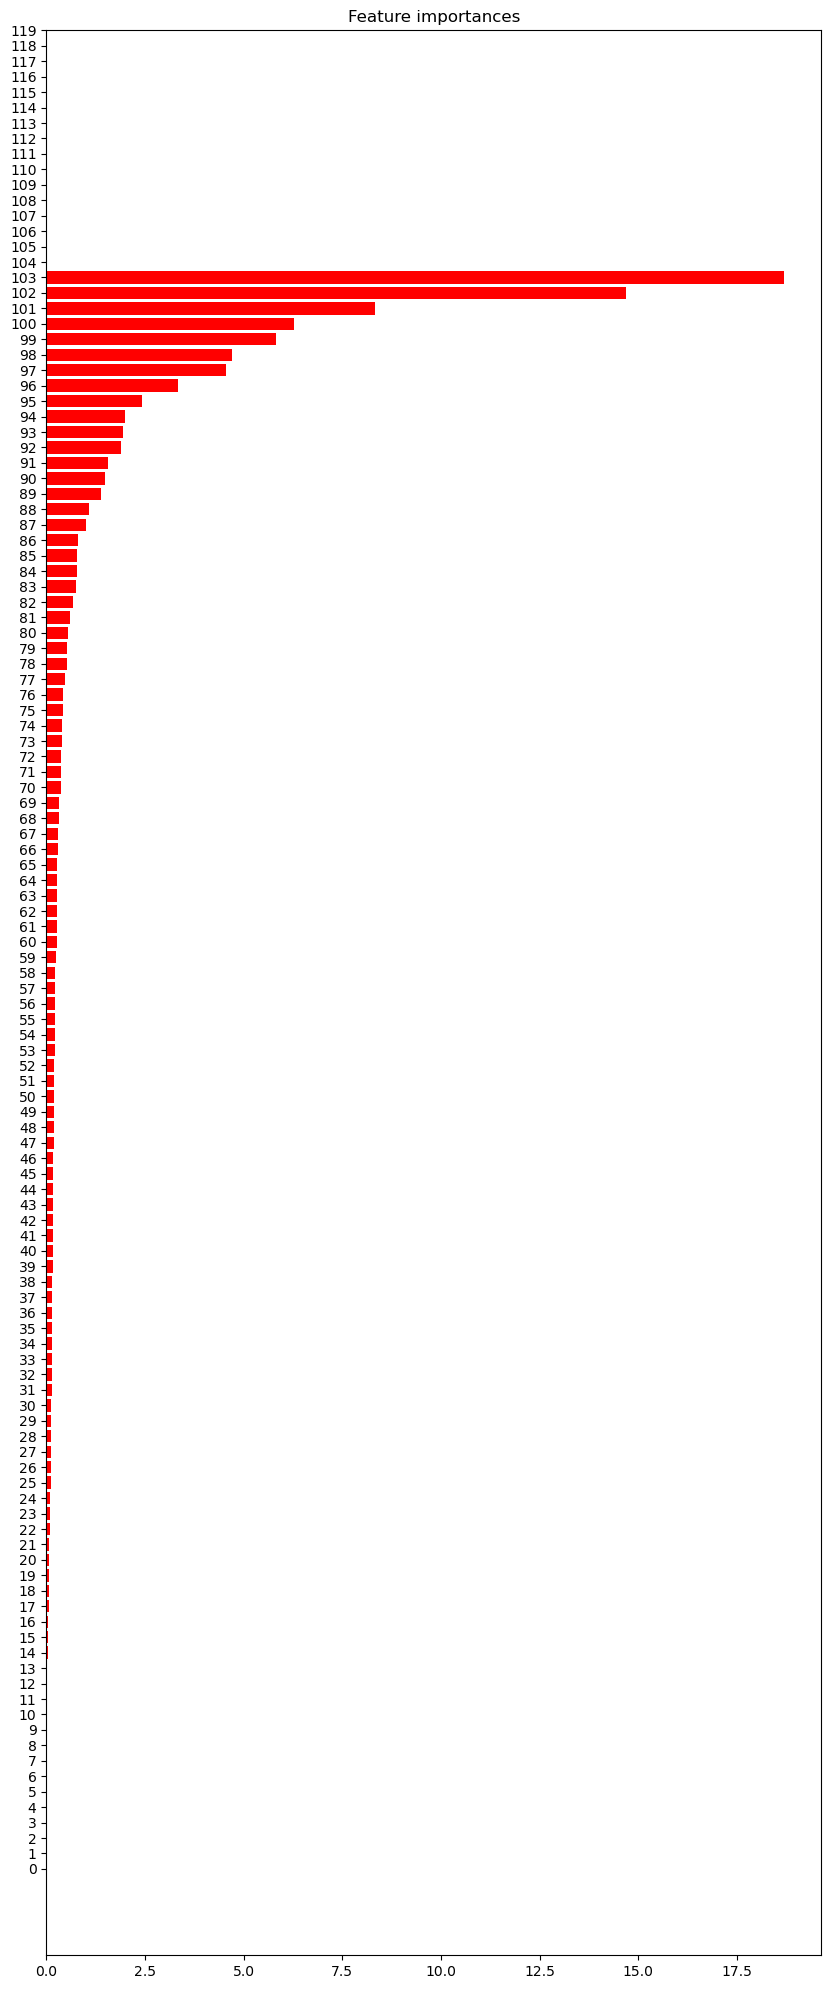

In [91]:
plt.figure(figsize=(10, 25))
plt.title("Feature importances")
plt.barh(range(X_num.shape[1]), feat_imp['imp'],
       color="r", align="center")
plt.yticks(range(X.shape[1]), feat_imp['col'])
plt.ylim([-1, X_num.shape[1]])
plt.show()

In [92]:
X_num_drop = X_num.drop(feat_imp['col'][:15], axis=1)

In [93]:
x_train_drop, x_test_drop = train_test_split(X_num_drop, test_size=0.3, random_state=0)

In [94]:
cat_model = CatBoostClassifier(task_type='CPU', loss_function='CrossEntropy', depth=6, 
                              iterations=1000, learning_rate=0.04)
cat_model.fit(x_train_drop, y_train, verbose=False)
y_cat = cat_model.predict_proba(x_test_drop)[:, 1]
print('score:', average_precision_score(y_test, y_cat))

score: 0.23583516565357782


Качество даже немного улучшилось.

In [95]:
lgbm_model = LGBMClassifier(n_estimators=1000, metric='binary_logloss', max_depth=5, 
                            learning_rate=0.01)
lgbm_model.fit(x_train, y_train)
feat_imp_lgbm = pd.DataFrame({'imp': lgbm_model.feature_importances_, 'col': num_columns})
feat_imp_lgbm = feat_imp_lgbm.sort_values(by=['imp'])

[LightGBM] [Info] Number of positive: 17485, number of negative: 197772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11115
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081228 -> initscore=-2.425771
[LightGBM] [Info] Start training from score -2.425771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

ValueError: The number of FixedLocator locations (120), usually from a call to set_ticks, does not match the number of labels (104).

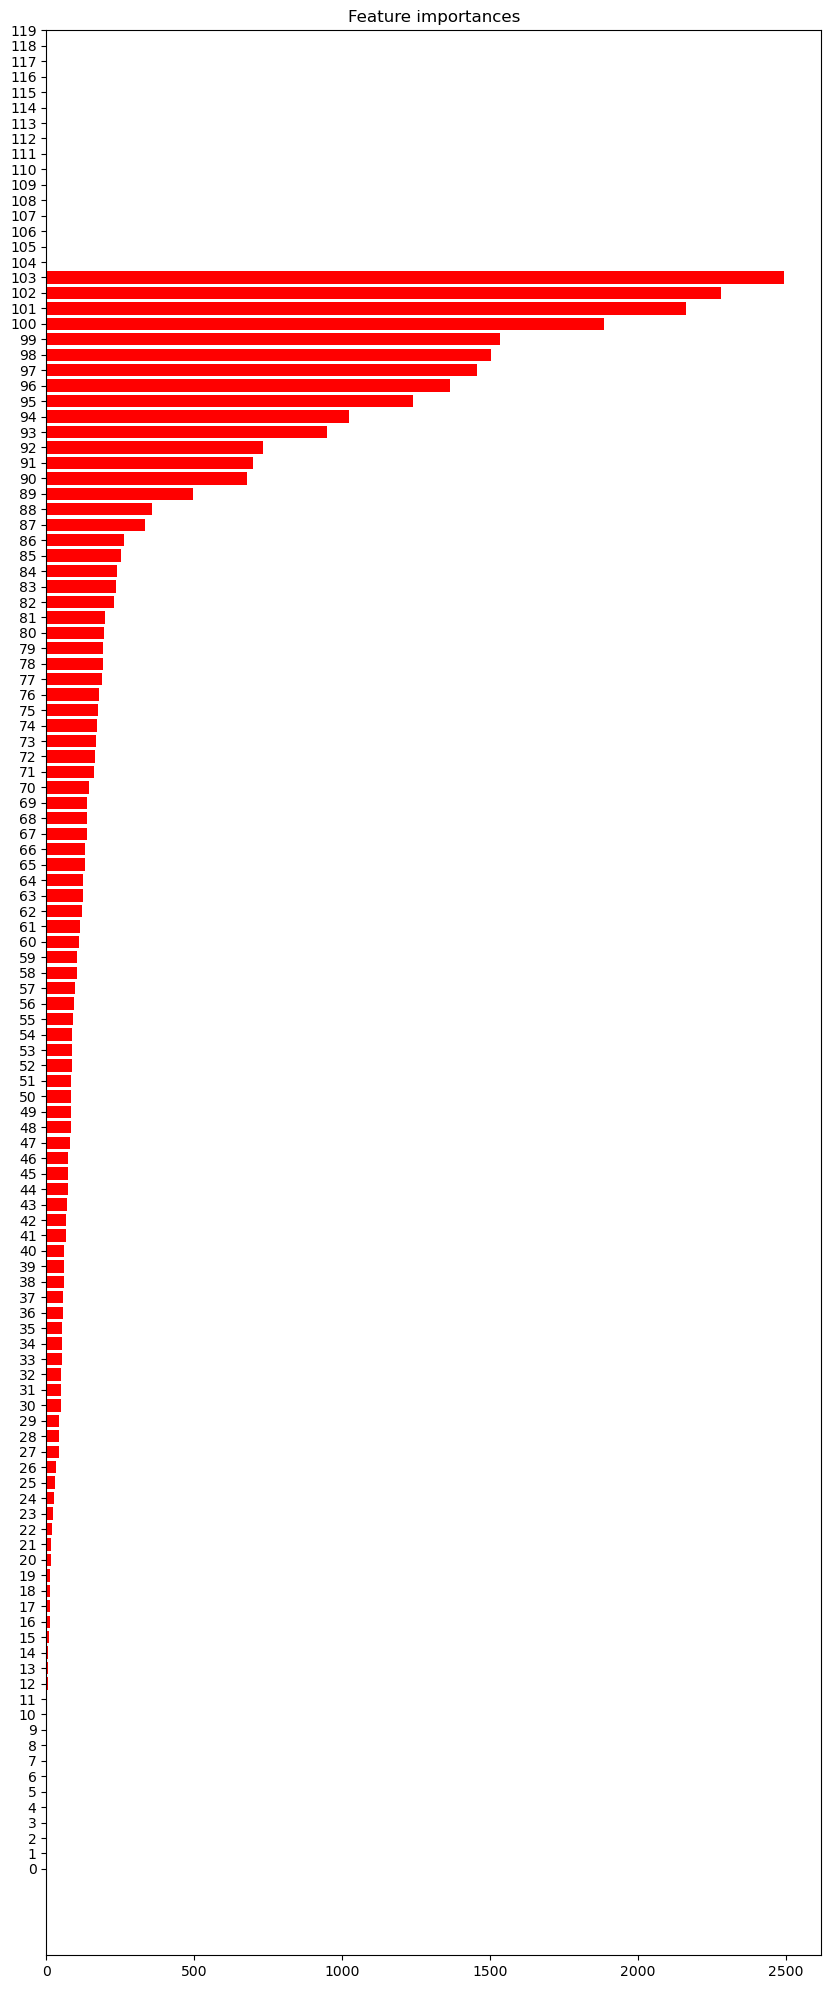

In [96]:
plt.figure(figsize=(10, 25))
plt.title("Feature importances")
plt.barh(range(X_num.shape[1]), feat_imp_lgbm['imp'],
       color="r", align="center")
plt.yticks(range(X.shape[1]), feat_imp_lgbm['col'])
plt.ylim([-1, X_num.shape[1]])
plt.show()

In [97]:
X_num_drop_lgbm = X_num.drop(feat_imp_lgbm['col'][:18], axis=1)

In [98]:
x_train_drop_lgbm, x_test_drop_lgbm = train_test_split(X_num_drop_lgbm, test_size=0.3, random_state=0)

In [ ]:
lgbm_model = LGBMClassifier(n_estimators=1000, metric='binary_logloss', max_depth=5, 
                            learning_rate=0.01)
lgbm_model.fit(x_train_drop_lgbm, y_train)
y_lgbm = lgbm_model.predict_proba(x_test_drop_lgbm)[:, 1]
print('score:', average_precision_score(y_test, y_lgbm))

[LightGBM] [Info] Number of positive: 17485, number of negative: 197772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10780
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081228 -> initscore=-2.425771
[LightGBM] [Info] Start training from score -2.425771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Качество совсем не ухудшилось, значит столбцы, которые были удалены - незначительны.